<a href="https://colab.research.google.com/github/wesleynewcomb/wesleynewcomb/blob/main/CSCI250_FinalAssignment_Team_Stell_AI_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="text-align:center">
    
# Pneumonia Detection from Chest X-rays

### Palomar College Final Project Fall 2022

#### Team Stell\*AI\*r
    
#### Marjolein Legge-Beekman (Team Leader)<br> 
#### Alberto Delgado<br>
#### Wesley Newcomb <br>
#### Paul Sandeen <br>
#### Martin Zamora
    
</div>

## Introduction

This project uses publicly available labeled chest X-ray image data of healthy patients and patients with Pneumonia. The X-ray image data will be used to train a classification algorithm to simulate making a diagnosis  for Pneumonia. Different sizes of training data will be used to perform a regression analysis to determine the optimal size of the training set.

## Intended Audience

The project assumes familiarity with the Python programming language and its associated libraries, including Numpy, pandas, matplotlib, Scikit-learn, Tensorflow, and Keras. A basic understanding of machine learning techniques is required.

## Data Source

The original data used for this project is publicy available from:<br>
"Chest X-Ray Images (Pneumonia)"<br>
https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia/discussion <br>
The dataset is maintained by Paul Mooney

## DESCRIPTION OF THE DATASET AS DOWNLOADED FROM KAGGLE:

Mounted at /content/gdrive/


The dataset consists of x-ray images that show either normal lungs or lungs with pneumonia, divided over the following directories:
/content/gdrive/MyDrive/chest_xray/val
/content/gdrive/MyDrive/chest_xray/train
/content/gdrive/MyDrive/chest_xray/test
/content/gdrive/MyDrive/chest_xray/val/PNEUMONIA
/content/gdrive/MyDrive/chest_xray/val/NORMAL
/content/gdrive/MyDrive/chest_xray/train/PNEUMONIA
/content/gdrive/MyDrive/chest_xray/train/NORMAL
/content/gdrive/MyDrive/chest_xray/test/PNEUMONIA
/content/gdrive/MyDrive/chest_xray/test/NORMAL


Normal X-rays: There are 1341 images in the training set; 234 in the test set and 8 in the validation set: 1583 in total.
Pneumonia X-rays: There are 3875 images in the training set; 390 in the test set and 8 in the validation set: 4273 in total.
There are a total of 5856 images in the dataset.


These are randomly picked images of a normal or pneumonia X-ray from each folder
The selected normal x-rays have the following 

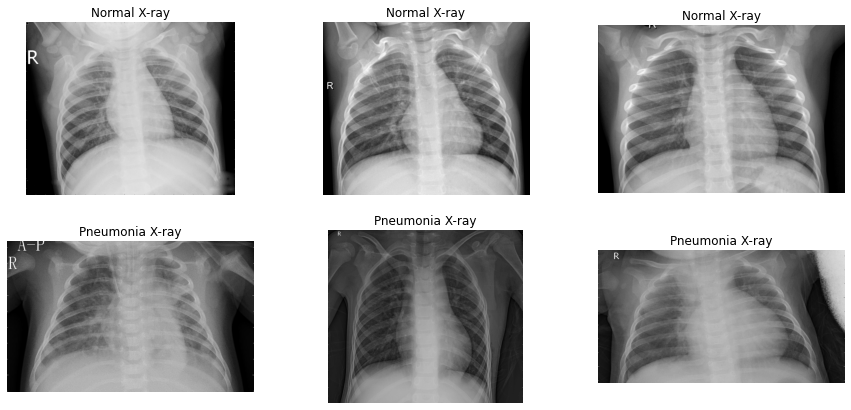

In [ ]:
#ACCESS THE DATASET
# Import the Colab drive mapping library
from google.colab import drive

# Map the drive mountpoint
drive.mount('/content/gdrive/', force_remount=True)

#UPDATED 11/15/2022 - MLB: I have written some code to describe the dataset and to plot some random images from the dataset (before the images were not random). Per https://dev.mrdbourke.com/tensorflow-deep-learning/03_convolutional_neural_networks_in_tensorflow/ it is good to describe the dataset before starting on training.

#DESCRIBE THE DATASET
import os
import fnmatch
import random
import matplotlib.pyplot as plt

#the path below works if you uploaded the chest_xray folder into the root directory of My Drive. If not, adjust the input path
# List of folders in complete directory
folder_list = []
path = "/content/gdrive/MyDrive/chest_xray/" #do not put a space in My Drive -> will cause problems later

print("\n\nThe dataset consists of x-ray images that show either normal lungs or lungs with pneumonia, divided over the following directories:") 
for path, folders, files in os.walk(path):
    for folder in folders:
        folder_list.append(os.path.join(path, folder))

#delete merge_directories (created in code further on) from folder_list, if they exist, so no random image is pulled from those directories in this code block. Directories are nly deleted from listing, not from Drive.
for folder_name in folder_list:
  #print(folder_name + " -->  " + str(fnmatch.fnmatch(folder_name,"*MERGED*")))
  if (fnmatch.fnmatch(folder_name,"*MERGED*")):
    #print("Removing an unnecessary directory from folder_list")
    folder_list.remove(folder_name)
for folder_name in folder_list: #for some reason the loop above doesn't cycle through all folder names, so repeat the loop to get rid of final merge folder... until a better solution is found
  #print(folder_name + " -->  " + str(fnmatch.fnmatch(folder_name,"*MERGED*")))
  if (fnmatch.fnmatch(folder_name,"*MERGED*")):
    #print("Removing an unnecessary directory from folder_list")
    folder_list.remove(folder_name)
for folder_name in folder_list:
  #print(folder_name + " -->  " + str(fnmatch.fnmatch(folder_name,"*MERGED*")))
  if (fnmatch.fnmatch(folder_name,"*web_x*")):
    #print("Removing an unnecessary directory from folder_list")
    folder_list.remove(folder_name)
for folder_name in folder_list:
    print(folder_name)

#List number of images in each folder. Each folder contains a _DS-Store file, so match for .jpeg to only count image files
num_normal_images_train = len(fnmatch.filter(os.listdir("/content/gdrive/MyDrive/chest_xray/train/NORMAL"), '*.jpeg'))
num_normal_images_test = len(fnmatch.filter(os.listdir("/content/gdrive/MyDrive/chest_xray/test/NORMAL"), '*.jpeg'))
num_normal_images_val = len(fnmatch.filter(os.listdir("/content/gdrive/MyDrive/chest_xray/val/NORMAL"), '*.jpeg'))
sum_normal = num_normal_images_train + num_normal_images_test + num_normal_images_val

num_pneumonia_images_train = len(fnmatch.filter(os.listdir("/content/gdrive/MyDrive/chest_xray/train/PNEUMONIA"), '*.jpeg'))
num_pneumonia_images_test = len(fnmatch.filter(os.listdir("/content/gdrive/MyDrive/chest_xray/test/PNEUMONIA"), '*.jpeg'))
num_pneumonia_images_val = len(fnmatch.filter(os.listdir("/content/gdrive/MyDrive/chest_xray//val/PNEUMONIA"), '*.jpeg'))
sum_pneumonia = num_pneumonia_images_train + num_pneumonia_images_test + num_pneumonia_images_val

print(f"\n\nNormal X-rays: There are {num_normal_images_train} images in the training set; {num_normal_images_test} in the test set and {num_normal_images_val} in the validation set: {sum_normal} in total.")
print(f"Pneumonia X-rays: There are {num_pneumonia_images_train} images in the training set; {num_pneumonia_images_test} in the test set and {num_pneumonia_images_val} in the validation set: {sum_pneumonia} in total.")
print(f"There are a total of {sum_normal + sum_pneumonia} images in the dataset.\n\n")

#show some random images from each folder
print("These are randomly picked images of a normal or pneumonia X-ray from each folder")

random_images_normal = []
for foldername in folder_list: 
  if fnmatch.fnmatch(foldername, "*NORMAL*") == True:
    random_image = (random.sample(os.listdir(foldername), 1)) #this line will also select the directory /train/; /val/; and /test/ as a random example (Linux does not differentiate between files and folders), but these are not image files, so need to be excluded
    random_images_normal.append(str(foldername) + "/" + str(random_image).replace("[","").replace("]","").replace("'","").replace("'",""))
##print(random_images_normal)
    
random_images_pneumonia = []
for foldername in folder_list: #use [3:] to exclude the main directories "train" "test" and "val": these do nnot contain images, just subdirectories
  if fnmatch.fnmatch(foldername, "*PNEUMONIA*") == True:
    random_image = (random.sample(os.listdir(foldername), 1)) #this line will also select the directory /train/; /val/; and /test/ as a random example (Linux does not differentiate between files and folders), but these are not image files, so need to be excluded
    random_images_pneumonia.append(str(foldername) + "/" + str(random_image).replace("[","").replace("]","").replace("'","").replace("'",""))
#print(random_images_pneumonia)

#Show information about the size of the image file for each of the selected images
print("The selected normal x-rays have the following shape:")
for img in random_images_normal:
  image = plt.imread(img)
  print(f"\tImage shape: {image.shape}") # show the shape of each image
print("The selected pneumonia x-rays have the following shape:")
for img in random_images_pneumonia:
  image = plt.imread(img)
  print(f"\tImage shape: {image.shape}") # show the shape of each image

print("These are the visulaizations of the randomly picked images of a normal and pneumonia X-ray from each folder")
fig = plt.figure(figsize=(15, 7))
fig.tight_layout()
for n in range(3):  
  fig.add_subplot(2, 3, n+1)
  plt.imshow(plt.imread(random_images_normal[n]), cmap='gray')
  plt.axis('off')
  plt.title("Normal X-ray")
for n in range(3):  
  fig.add_subplot(2, 3, n+4)
  plt.imshow(plt.imread(random_images_pneumonia[n]), cmap='gray')
  plt.axis('off')
  plt.title("Pneumonia X-ray")



## MERGING OF THE NORMAL IMAGES INTO ONE FOLDER AND OF THE PNEUMONIA IMAGES INTO ONE FOLDER
# (this code copies all images over to merge_folders and takes time to complete. Don't run it unless you need to merge the image folders - note that on the shared chest_xray folder, images have already been merged)

In [ ]:
#MERGE ALL NORMAL IMAGES IN ONE FOLDER AND ALL PNEUMONIA IMAGES IN A FOLDER - 11/15/2022 MLB

import os
import shutil

from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

#list folders containing normal and pneumonia x-rays respectively before merge
path = "/content/gdrive/MyDrive/chest_xray/" #again, do not add a space in "My Drive"
normal_folders = [] 
pneumonia_folders = []
for foldername in folder_list: #folder_list is defined in previous code block
  if fnmatch.fnmatch(foldername, "*NORMAL*"):
    normal_folders.append(foldername)
  if fnmatch.fnmatch(foldername, "*PNEUMONIA*"):
    pneumonia_folders.append(foldername)
#print("These folders contain normal images: " + str(normal_folders))
#print("These folders contain pneumonia images: " + str(pneumonia_folders))

##I have commented the below out, since MERGE directories have been made and the below will just print an error message. 
#make merge_directories (will not make directories on a shared drive, just on your local drive when you run this code locally)
'''
try:
  os.mkdir(path + "MERGED/ALL_NORMAL", 0o777)
except OSError as error:
    print(error)
try:
  os.mkdir(path + "MERGED/ALL_PNEUMONIA", 0o777)
except OSError as error:
    print(error) 
'''

#merge all files in the original directories to the merge_directories

# *** READ THIS WARNING ***
#ONLY UNCOMMENT AND RUN THIS CODE IF YOU NEED TO COPY ALL THE IMAGES. RUNNING THIS LINE MAY TAKE 15+ min!
# *** AFTER RUNNING CODE, COMMENT IT BACK OUT SO IT WON'T RUN AGAIN ***
## THIS CODE ONLY WORKS TO MERGE DATA YOU HAVE IN YOUR LOCAL FILE SYSTEM. IT WILL NOT WORK ON WESLEY'S SHARED DRIVE, SINCE THE PATH LINKS TO A LINK TO THE SHARED DRIVE, NIT THE DRIVE ITSELF
##So, you need to have your own copy of the images on your Google Drive and then this code will work.

'''
for folder in normal_folders:
  orig_path = folder + "/"
  dest_path = path + "MERGED/ALL_NORMAL"
  files = os.listdir(orig_path)
  for f in files:
    src = orig_path + f
    dst = dest_path
    print(f, src, dst)
    %cp $src $dst
    
for folder in pneumonia_folders:
  orig_path = folder + "/"
  dest_path = path + "MERGED/ALL_PNEUMONIA"
  print(orig_path, dest_path)
  files = os.listdir(orig_path)
  for f in files:
    src = orig_path + f
    dst = dest_path
    print(f, src, dst)
    %cp $src $dst
'''


#check that all images made it into the merge directories. Should be 1583 normal, 4273 pneumonia and 5856 total
num_normal_images_total = len(fnmatch.filter(os.listdir(path + "MERGED/ALL_NORMAL"), '*.jpeg'))
num_pneumonia_images_total = len(fnmatch.filter(os.listdir(path + "MERGED/ALL_PNEUMONIA"), '*.jpeg'))
print(f"\n\nNormal X-rays: There are {num_normal_images_total} images in the merged set")
print(f"Pneumonia X-rays: There are {num_pneumonia_images_total} images in the merged set")
print(f"There are a total of {num_normal_images_total + num_pneumonia_images_total} images in the merged dataset.\n\n")


Mounted at /content/gdrive/


Normal X-rays: There are 1583 images in the merged set
Pneumonia X-rays: There are 4273 images in the merged set
There are a total of 5856 images in the merged dataset.




##DEVELOP A MODEL: PREPROCESS THE DATA
Read the image files from the directories, split them in training and test sets, show the binary classes (0 = healthy; 1 = pneumonia)/
Batch soze is defined as 32, image size as 256, so check that the preprocessed data conform to this.
Then, rescale the pixel values to a value 0-1.

In [ ]:
  #PREPROCESS THE DATA
 
 # 1. SPLIT MERGED DATA INTO TEST AND TRAIN SETS - https://www.tensorflow.org/tutorials/load_data/images
 
import tensorflow as tf
import numpy as np

path = "/content/gdrive/MyDrive/chest_xray/"

batch_size = 32
img_dir = path + "MERGED/"
print(img_dir)

#This split is the customary 80/20
train_ds = tf.keras.utils.image_dataset_from_directory( #https://keras.io/api/data_loading/image/ --> this creates a tf.data.Dataset
  img_dir,
  #image_size=(256, 256), #this is the default size, but I added this line so it is easy to edit image size.
  validation_split=0.2,
  color_mode="grayscale",
  subset="training",
  seed=123,
  batch_size=32)

val_ds = tf.keras.utils.image_dataset_from_directory(
  img_dir,
  #image_size=(256, 256), #this is the default size, but I added this line so it is easy to edit image size.
  validation_split=0.2,
  color_mode="grayscale",
  subset="validation",
  image_size=(256, 256),
  seed=123,
  batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)


/content/gdrive/MyDrive/chest_xray/MERGED/
Found 5856 files belonging to 2 classes.
Using 4685 files for training.
Found 5856 files belonging to 2 classes.
Using 1171 files for validation.
['ALL_NORMAL', 'ALL_PNEUMONIA']


In [ ]:

#I meant for this cell to be together with the cell above, but Colab gives me errors if I do that, and no errors if I split the code in two parts. Weird.

#check some of the data shapes and sizes
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)  #prints batch  size - img height -- img width -RGB channel count (always 3 for color, or 1 for grayscale)
  print(labels_batch.shape)
  break

#rescaling gives all pixels a value from 0 - 1 rather than  0 - 255 
#rescale the train_ds and print a few checks
normalization_layer = tf.keras.layers.Rescaling(1./255)
normalized_train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_train_ds)) #should show batch size 32
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))
print(image_batch[0]) #prints the normalized pixels for the first image from the batch
print(labels_batch) #prints the labels (0=normal, 1 = pneumonia) in the batch


#do same normalization for validation set
for image_batch, labels_batch in val_ds:
  print(image_batch.shape) #prints batch  size - img height -- img width -RGB channel count (always 3)
  print(labels_batch.shape)
  break
normalized_val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_val_ds)) #should show batch size 32
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))
first_image[0].shape

(32, 256, 256, 1)
(32,)
0.034832645 0.9988416
tf.Tensor(
[[[0.18823531]
  [0.18823531]
  [0.18823531]
  ...
  [0.13333334]
  [0.13333334]
  [0.13333334]]

 [[0.18823531]
  [0.18823531]
  [0.18823531]
  ...
  [0.12941177]
  [0.12941177]
  [0.12941177]]

 [[0.18823531]
  [0.18723002]
  [0.18517157]
  ...
  [0.12855393]
  [0.12855393]
  [0.12855393]]

 ...

 [[0.05566598]
  [0.27486214]
  [0.2557598 ]
  ...
  [0.1952206 ]
  [0.21168813]
  [0.05022021]]

 [[0.25490198]
  [0.25882354]
  [0.25882354]
  ...
  [0.19215688]
  [0.19215688]
  [0.19215688]]

 [[0.25918543]
  [0.25396562]
  [0.25882354]
  ...
  [0.19215688]
  [0.19215688]
  [0.19215688]]], shape=(256, 256, 1), dtype=float32)
tf.Tensor([1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1 1 0 0], shape=(32,), dtype=int32)
(32, 256, 256, 1)
(32,)
0.0 1.0


TensorShape([256, 1])

##CREATE A BASIC MODEL
This model uses 3 convolutional layers to help extract features from the images. Run "Pre process data first".

In [ ]:
#create a basic model, from https://dev.mrdbourke.com/tensorflow-deep-learning/03_convolutional_neural_networks_in_tensorflow/#1-import-and-become-one-with-the-data
import tensorflow as tf
from keras.optimizers import Adam
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from keras import Sequential

#Create the model - a basic Convolutional Neural Network
model_1 = Sequential([
  Conv2D(filters=10, 
         kernel_size=3, # for explanation review https://poloclub.github.io/cnn-explainer/. See also https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D Kernel size of 3 means the kernel processes 3x3 pixels at one time,
         strides=1, #moving over image in steps of 1 pixel
         padding='valid',
         activation='relu', 
         input_shape=(256, 256, 1)), # input layer (specify input shape), this is shown in output previous code block
  Conv2D(10, 3, activation='relu'), #ReLU is faster to train than e.g. Sigmoid
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])

#not specified in model above is max-pooling which looks at groups of 2x2 pixels and uses the maximum value of any of the four pixels to create a more blocky picture of half the pixel size. Suing MaxPooling reduces overfitting

# Compile the model
model_1.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy', tf.keras.metrics.Precision(name="precision"), tf.keras.metrics.Recall(name='recall')]) #add a name for the metrics, or with every run metrics get a suffix (precison, precision_1, etc)

##FITTING THE BASIC MODEL
This takes about an hour...

In [ ]:
#fit the model ***WARNING: RUNNING THIS CODE TAKES ABOUT AN HOUR ****

train_data = normalized_train_ds
test_data = normalized_val_ds

# Check lengths of training and test data generators
len(train_data), len(test_data) #if 4685 images in training set, then len(train_data) should be 4685 / batch size 32 = 147 (round up). For validation set of 1171 should be 37.

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))



NameError: ignored

##VISUALIZATION OF THE BASIC MODEL
Show accuracy and losses. Note how the loss in the test/validation set increases at the 5th epoch and diverges from the training set. This is an indication of overfitting.

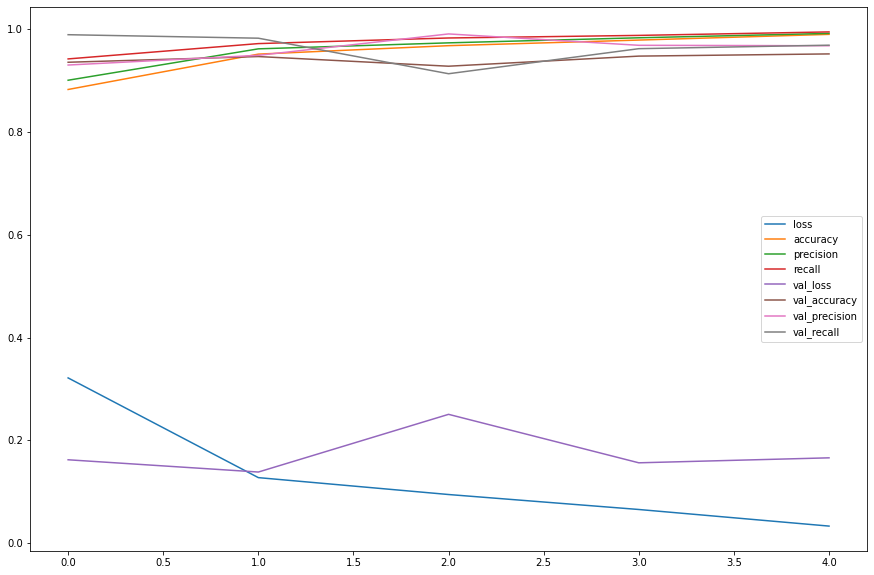

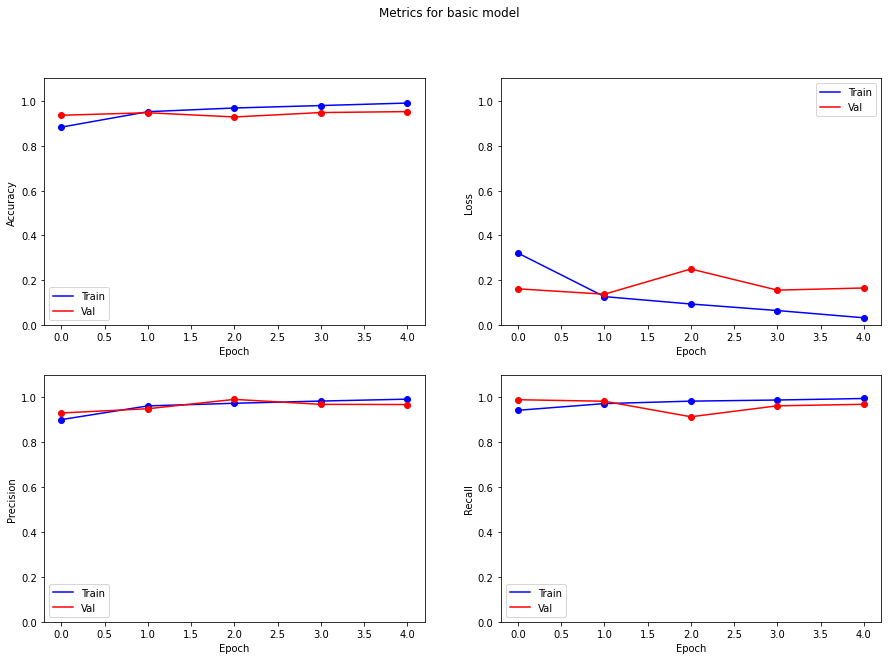

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 254, 254, 10)      100       
                                                                 
 conv2d_16 (Conv2D)          (None, 252, 252, 10)      910       
                                                                 
 conv2d_17 (Conv2D)          (None, 250, 250, 10)      910       
                                                                 
 flatten_5 (Flatten)         (None, 625000)            0         
                                                                 
 dense_5 (Dense)             (None, 1)                 625001    
                                                                 
Total params: 626,921
Trainable params: 626,921
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# EVALUATE THE BASIC MODEL
#Plot the training curves
import pandas as pd
pd.DataFrame(history_1.history).plot(figsize=(15, 10));

# Plot the metrics separately
def plot_metrics(history): # adapted from https://www.tensorflow.org/tutorials/structured_data/imbalanced_data
  metrics = ['accuracy', 'loss', 'precision', 'recall']
  plt.figure(figsize=(15, 10))
  plt.suptitle('Metrics for basic model')
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()    
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color='blue', label='Train')
    plt.plot(history.epoch, history.history[metric], 'bo')
    plt.plot(history.epoch, history.history['val_'+metric],
             color='red', label='Val')
    plt.plot(history.epoch, history.history['val_'+metric],
             'ro')    
    plt.xlabel('Epoch')
    plt.ylabel(name)
    plt.ylim([0,1.1])    
    plt.legend()  
  plt.show()
# Check out the loss curves of model_1
plot_metrics(history_1)
# Check out our model's architecture
model_1.summary()

##IMPROVED MODEL
Adding a MaxPool2D layer after every convolution layer is known to reduce overfitting. Adding an image augmentation step can also reduce overfitting, but is not done here, since this improved model is sufficient for the goal of our project. A MaxPool2D layer also reduces processing time, since it reduces the number of features.
Note how the overall accuracy of this model is slightly lower than in the basic model, but there is no sign of overfitting. 
Note also that the summary of the model shows that there were less parameters taken into account than in the basic model. This is a result of the MaxPool2D which reduces image size. Run "Preprocess data first".

147 37
Epoch 1/5
147/147 [==============================] - 522s 4s/step - loss: 0.3473 - accuracy: 0.8463 - precision: 0.8484 - recall: 0.9590 - val_loss: 0.1580 - val_accuracy: 0.9377 - val_precision: 0.9431 - val_recall: 0.9762
Epoch 2/5
147/147 [==============================] - 213s 1s/step - loss: 0.1696 - accuracy: 0.9330 - precision: 0.9471 - recall: 0.9611 - val_loss: 0.1430 - val_accuracy: 0.9479 - val_precision: 0.9703 - val_recall: 0.9604
Epoch 3/5
147/147 [==============================] - 208s 1s/step - loss: 0.1545 - accuracy: 0.9409 - precision: 0.9518 - recall: 0.9673 - val_loss: 0.1292 - val_accuracy: 0.9539 - val_precision: 0.9748 - val_recall: 0.9638
Epoch 4/5
147/147 [==============================] - 215s 1s/step - loss: 0.1478 - accuracy: 0.9436 - precision: 0.9560 - recall: 0.9667 - val_loss: 0.1245 - val_accuracy: 0.9564 - val_precision: 0.9653 - val_recall: 0.9773
Epoch 5/5
147/147 [==============================] - 210s 1s/step - loss: 0.1341 - accuracy: 0.95

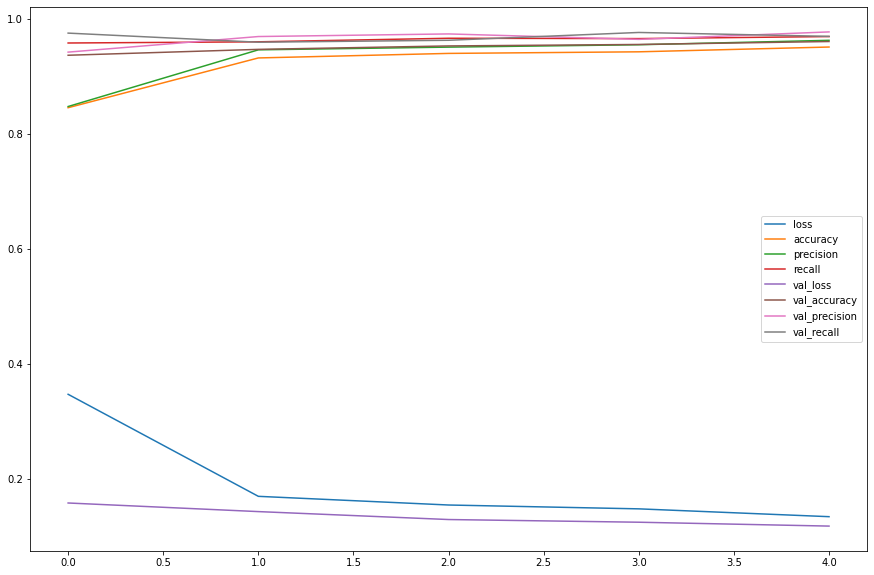

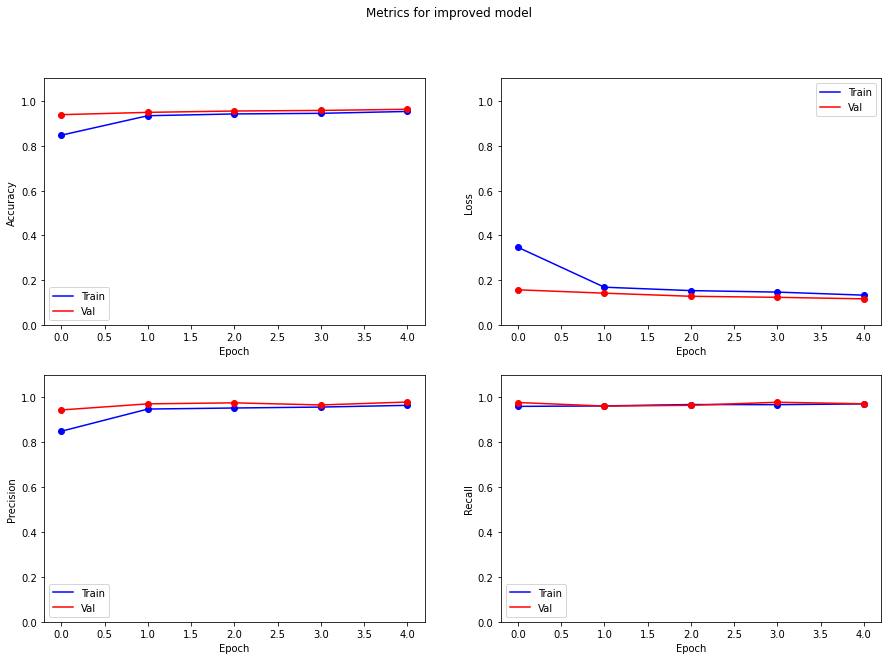

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 10)      100       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 10)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 10)      910       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 10)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 10)        910       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 10)      

In [ ]:
#ADD MAX POOLING TO MODEL TO REDUCE OVERFITTING
import pandas as pd
import tensorflow as tf
from keras.optimizers import Adam
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from keras import Sequential

# Create a modified model, with MaxPool2D added after each convolution layer
model_2 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(256, 256, 1)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy', tf.keras.metrics.Precision(name="precision"), tf.keras.metrics.Recall(name='recall')])


# Check lengths of training and test data generators
print(str(len(train_data)), str(len(test_data))) #if 4685 images in training set, then len(train_data) should be 4685 / batch size 32 = 147 (round up). For validation set of 1171 should be 37.

# Fit the model
history_2 = model_2.fit(train_data,
                     epochs=5,
                     steps_per_epoch=len(train_data),
                     validation_data=test_data,
                     validation_steps=len(test_data))

# EVALUATE THE BASIC MODEL WITH ADDED MAX POOLING
#Plot the training curves

pd.DataFrame(history_2.history).plot(figsize=(15, 10));

# Plot the metrics separately
def plot_metrics(history): # adapted from https://www.tensorflow.org/tutorials/structured_data/imbalanced_data
  metrics = ['accuracy', 'loss', 'precision', 'recall']
  plt.figure(figsize=(15, 10))
  plt.suptitle('Metrics for improved model')
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()    
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color='blue', label='Train')
    plt.plot(history.epoch, history.history[metric], 'bo')
    plt.plot(history.epoch, history.history['val_'+metric],
             color='red', label='Val')
    plt.plot(history.epoch, history.history['val_'+metric],
             'ro')    
    plt.xlabel('Epoch')
    plt.ylabel(name)
    plt.ylim([0,1.1])    
    plt.legend()  
  plt.show()
# Check out the loss curves of model_1
plot_metrics(history_2)
# Check out our model's architecture
model_2.summary()

#Indeed, the train and test curve are converging a lot better than in model_1, which is a sign of less/no overfitting. The overall accuracy is slightly down, but still good.



The images found on the web are:
web_pneumonia1.jpg
web_pneumonia2.jpg
web_healthy1.jpg
healthy_with_gorilla.jpg

These are the visulaizations of the images found on the web of a normal and pneumonia X-rays
Image transformation OK:
(1, 256, 256, 1)
1/1 [==============================] - 0s 97ms/step
[[0.99548316]]
web_pneumonia1.jpg is predicted to show pneumonia. (Prediction value =0.99548316).
Image transformation OK:
(1, 256, 256, 1)
1/1 [==============================] - 0s 44ms/step
[[0.73688763]]
web_pneumonia2.jpg is predicted to show pneumonia. (Prediction value =0.73688763).
Image transformation OK:
(1, 256, 256, 1)
1/1 [==============================] - 0s 32ms/step
[[0.12693846]]
web_healthy1.jpg is predicted to show a normal lung. (Prediction value =0.12693846).
Image transformation OK:
(1, 256, 256, 1)
1/1 [==============================] - 0s 32ms/step
[[0.1378841]]
healthy_with_gorilla.jpg is predicted to show a normal lung. (Prediction value =0.1378841).


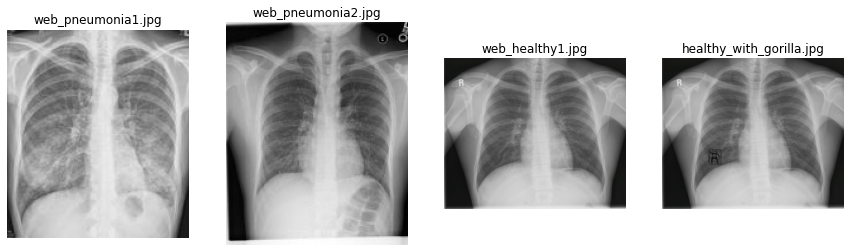

In [ ]:
#TRY THE MODEL WITH AN IMAGE FOUND ON THE WEB
# **** IN ORDER TO RUN THIS CODE, YOU NEED TO DOWNLOAD THE IMAGES AND STORE THEM ON YOUR DRIVE IN A NEW FOLDER "Web_xray":
#from https://prod-images-static.radiopaedia.org/images/1828160/319c43fb5c1c2fca2a4e710a7a6c4a_thumb.jpg save image as web_pneumonia1.jpg (or similar filename)
#from https://prod-images-static.radiopaedia.org/images/8589259/debc366fbee881069b1bd4b23a8020_thumb.jpg save image as web_pneumonia2.jpg (or similar)
#from https://www.distancecme.com/wp-content/uploads/2017/11/1-10-500-500-100.jpg save image as web_healthy1.jpg (or similar)

path_to_web_images="/content/gdrive/MyDrive/web_xray/"
 
 
# List of folders in complete directory
#!ls $path_to_web_images
webfolder_list = []

print("\n\nThe images found on the web are:")
for path, folders, files in os.walk(path_to_web_images):
    for filenames in files:         
      webfolder_list.append(filenames)
for file_name in webfolder_list:
    print(file_name)
print()

print("These are the visulaizations of the images found on the web of a normal and pneumonia X-rays")
fig = plt.figure(figsize=(15, 7))
fig.tight_layout()
for n in range(len(webfolder_list)):
  fig.add_subplot(1, 4, n+1)
  plt.imshow(plt.imread(path_to_web_images+webfolder_list[n]), cmap='gray')
  plt.axis('off')
  plt.title(str(webfolder_list[n]))


#transform the images into a similar format as the model was trained on

#define a function to transform any other image:
def prep_web_image(filename, img_shape=256):
    img = tf.io.read_file(filename)
    img = tf.image.decode_image(img, channels = 1) #make sure image has 3 RGB channels for color pics or 1 for black/white
    img = tf.image.resize(img, size = [img_shape, img_shape]) #make sure image is in the 256x256 shape
    img = img/255 #rescale the pizels to values 0-1
    img = tf.expand_dims(img, axis=0) #adds an artificial dimension, which was taken up by batch size in train data
    return img

for n in range(len(webfolder_list)):
  processed_web_image = prep_web_image(path_to_web_images+webfolder_list[n])
  print("Image transformation OK:")
  print(processed_web_image.shape)
#make a prediction based on model_1 for each of the pictures
  pred = model_2.predict(processed_web_image)
  print(pred)
  if pred[0][0] >= 0.500:
    print(str(webfolder_list[n]) + " is predicted to show pneumonia. (Prediction value =" + str(pred[0][0]) + ").")
  elif pred[0][0] <= 0.5:
    print(str(webfolder_list[n]) + " is predicted to show a normal lung. (Prediction value =" + str(pred[0][0]) + ").")

##CODE FOR THE EXPERIMENTS
The code from model_2 above is cleaned up and put in a function form, so that it is easier to run the experiments. Run this code block before running any of the different training size/image size code blocks below.


In [ ]:
# SETUP FOR THE MODELING EXPERIMENT (I HAVE TIDIED UP THE CODE)
#Import the Colab drive mapping library and (re)mount data, import libraries
from google.colab import drive
import tensorflow as tf
from keras.optimizers import Adam
from keras.layers import InputLayer, Dense, Flatten, Conv2D, MaxPool2D, Activation
from keras import Sequential
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt

drive.mount('/content/gdrive/')

#variable definitions
path = "/content/gdrive/MyDrive/chest_xray2/"
img_dir = path + "MERGED/"
batch_size = 32
path_to_web_images="/content/gdrive/MyDrive/web_xray/"
webfolder_list = [] # directory of non-dataset images to evaluate
for path, folders, files in os.walk(path_to_web_images):
    for filenames in files:         
      webfolder_list.append(filenames)

def run_model(train_size, img_size):
  #definte the model
  model = Sequential([
    InputLayer(input_shape=(img_size[0], img_size[1],1)),
    Conv2D(10, 3, activation='relu'), #may add inout_shape
    MaxPool2D(pool_size=2), # reduce number of features by half
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
  ])

  #Split the dataset
  train_ds = tf.keras.utils.image_dataset_from_directory( #https://keras.io/api/data_loading/image/ --> this creates a tf.data.Dataset
    img_dir,
    image_size=img_size, #this is the default size, but I added this line so it is easy to edit image size.
    validation_split=(1 - (train_size/100)),
    color_mode="grayscale",
    subset="training",
    seed=123,
    batch_size=32)
  val_ds = tf.keras.utils.image_dataset_from_directory(
    img_dir,
    image_size=img_size,
    validation_split=0.2,
    color_mode="grayscale",
    subset="validation",
    seed=123,
    batch_size=batch_size)
  
  #check the size of the images:    
  print("Images have been processed to shape: ")
  for image_batch, labels_batch in train_ds:
    print(image_batch.shape) #prints batch  size - img height -- img width -RGB channel count (always 3)
    break

  #rescaling gives all pixels a value from 0 - 1 rather than  0 - 255 
  normalization_layer = tf.keras.layers.Rescaling(1./255)
  normalized_train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
  normalized_val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

  train_data = normalized_train_ds 
  test_data = normalized_val_ds

  ### To visualize some images for this resolution
  print("Some images with resolution of " + str(img_size))
  plt.figure(figsize=(10, 10))
  class_names = train_ds.class_names
  for images, labels in val_ds.take(1):
    for i in range(8,12):
        ax = plt.subplot(1, 4, i-7)
        example = tf.reshape(images[i],IMAGE_SIZE)
        plt.imshow(example.numpy().astype("uint8"), cmap="gray")
        plt.title(class_names[labels[i]])
        plt.axis("off") 
  plt.show()

  #compile the model
  model.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy', tf.keras.metrics.Precision(name="precision"), tf.keras.metrics.Recall(name='recall')]) #add a name for the metrics, or with every run metrics get a suffix (precison, precision_1, etc)
                
  history = model.fit(train_data,
                     epochs=5,
                     steps_per_epoch=len(train_data),
                     validation_data=test_data,
                     validation_steps=len(test_data))  

  #evaluation. See https://wandb.ai/sauravmaheshkar/cross-entropy/reports/What-Is-Cross-Entropy-Loss-A-Tutorial-With-Code--VmlldzoxMDA5NTMx#:~:text=Cross%20entropy%20loss%20is%20a,close%20to%200%20as%20possible for discussion on loss function and https://medium.com/@fzammito/whats-considered-a-good-log-loss-in-machine-learning-a529d400632d
  model.summary() 
  plot_metrics(history)
    # Predict whether non dataset images are normal or show pneumonia
  for n in range(len(webfolder_list)):
    processed_web_image = prep_web_image(path_to_web_images+webfolder_list[n],img_size[0])
  #make a prediction based on model for each of the pictures
    pred = model.predict(processed_web_image)    
    if pred[0][0] >= 0.270:
      print(str(webfolder_list[n]) + " is predicted to show pneumonia. (Prediction value =" + str(pred[0][0]) + ").")
    elif pred[0][0] <= 0.27:
      print(str(webfolder_list[n]) + " is predicted to show a normal lung. (Prediction value =" + str(pred[0][0]) + ").")


def plot_metrics(history): # adapted from https://www.tensorflow.org/tutorials/structured_data/imbalanced_data
  metrics = ['accuracy', 'loss', 'precision', 'recall']
  plt.figure(figsize=(15, 10))
  plt.suptitle('Metrics for model with ' + "training size " + str(TRAIN_SIZE) + "%, image size: " + str(IMAGE_SIZE))
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()    
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color='blue', label='Train')
    plt.plot(history.epoch, history.history[metric], 'bo')
    plt.plot(history.epoch, history.history['val_'+metric],
             color='red', label='Val')
    plt.plot(history.epoch, history.history['val_'+metric],
             'ro')    
    plt.xlabel('Epoch')
    plt.ylabel(name)
    plt.ylim([0,1.1])    
    plt.legend()  
  plt.show()

#define a function to transform any other image:
def prep_web_image(filename, img_shape):  
    img = tf.io.read_file(filename)
    img = tf.image.decode_image(img, channels = 1) #make sure image has 3 RGB channels for color pics or 1 for black/white
    img = tf.image.resize(img, size = [img_shape, img_shape]) 
    img = img/255 #rescale the pizels to values 0-1
    img = tf.expand_dims(img, axis=0) #adds an artificial dimension, which was taken up by batch size in train data
    return img

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


##RUN THE EXPERIMENT: EFFECT OF TRAINING SET SIZE
Run the code in cell above first ("Code for experiment')

Found 5856 files belonging to 2 classes.
Using 59 files for training.
Found 5856 files belonging to 2 classes.
Using 1171 files for validation.
Images have been processed to shape: 
(32, 256, 256, 1)
Some images with resolution of (256, 256)


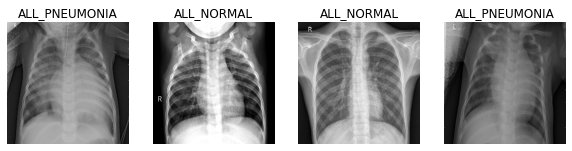

Epoch 1/5
2/2 [==============================] - 24s 21s/step - loss: 0.6628 - accuracy: 0.7288 - precision: 0.7288 - recall: 1.0000 - val_loss: 0.5728 - val_accuracy: 0.7541 - val_precision: 0.7541 - val_recall: 1.0000
Epoch 2/5
2/2 [==============================] - 22s 21s/step - loss: 0.5959 - accuracy: 0.7288 - precision: 0.7288 - recall: 1.0000 - val_loss: 0.5737 - val_accuracy: 0.7541 - val_precision: 0.7541 - val_recall: 1.0000
Epoch 3/5
2/2 [==============================] - 23s 22s/step - loss: 0.6075 - accuracy: 0.7288 - precision: 0.7288 - recall: 1.0000 - val_loss: 0.5654 - val_accuracy: 0.7541 - val_precision: 0.7541 - val_recall: 1.0000
Epoch 4/5
2/2 [==============================] - 22s 21s/step - loss: 0.5885 - accuracy: 0.7288 - precision: 0.7288 - recall: 1.0000 - val_loss: 0.5636 - val_accuracy: 0.7541 - val_precision: 0.7541 - val_recall: 1.0000
Epoch 5/5
2/2 [==============================] - 22s 21s/step - loss: 0.5823 - accuracy: 0.7288 - precision: 0.7288 - re

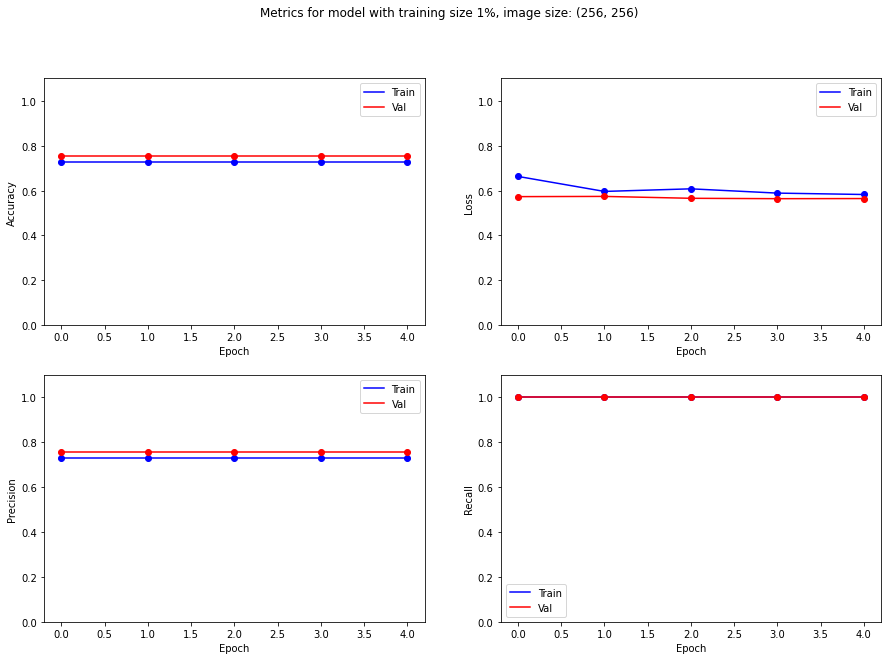

1/1 [==============================] - 0s 82ms/step
web_pneumonia1.jpg is predicted to show pneumonia. (Prediction value =0.75518715).
1/1 [==============================] - 0s 35ms/step
web_pneumonia2.jpg is predicted to show pneumonia. (Prediction value =0.70168734).
1/1 [==============================] - 0s 33ms/step
web_healthy1.jpg is predicted to show pneumonia. (Prediction value =0.6853675).
1/1 [==============================] - 0s 35ms/step
healthy_with_gorilla.jpg is predicted to show pneumonia. (Prediction value =0.68627584).


In [ ]:
TRAIN_SIZE = 1
IMAGE_SIZE = (256, 256)
run_model(TRAIN_SIZE, IMAGE_SIZE)

Found 5856 files belonging to 2 classes.
Using 293 files for training.
Found 5856 files belonging to 2 classes.
Using 1171 files for validation.
Images have been processed to shape: 
(32, 256, 256, 1)
Some images with resolution of (256, 256)


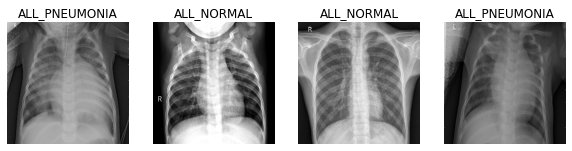

Epoch 1/5
10/10 [==============================] - 37s 3s/step - loss: 0.6134 - accuracy: 0.7167 - precision: 0.7222 - recall: 0.9858 - val_loss: 0.5728 - val_accuracy: 0.7541 - val_precision: 0.7541 - val_recall: 1.0000
Epoch 2/5
10/10 [==============================] - 32s 3s/step - loss: 0.5763 - accuracy: 0.7201 - precision: 0.7201 - recall: 1.0000 - val_loss: 0.5219 - val_accuracy: 0.7541 - val_precision: 0.7541 - val_recall: 1.0000
Epoch 3/5
10/10 [==============================] - 32s 3s/step - loss: 0.4516 - accuracy: 0.7509 - precision: 0.7447 - recall: 0.9953 - val_loss: 0.4129 - val_accuracy: 0.8770 - val_precision: 0.8853 - val_recall: 0.9615
Epoch 5/5
10/10 [==============================] - 32s 3s/step - loss: 0.3744 - accuracy: 0.8601 - precision: 0.8455 - recall: 0.9858 - val_loss: 0.3113 - val_accuracy: 0.8770 - val_precision: 0.8774 - val_recall: 0.9728
Model: "sequential_7"
_________________________________________________________________
 Layer (type)               

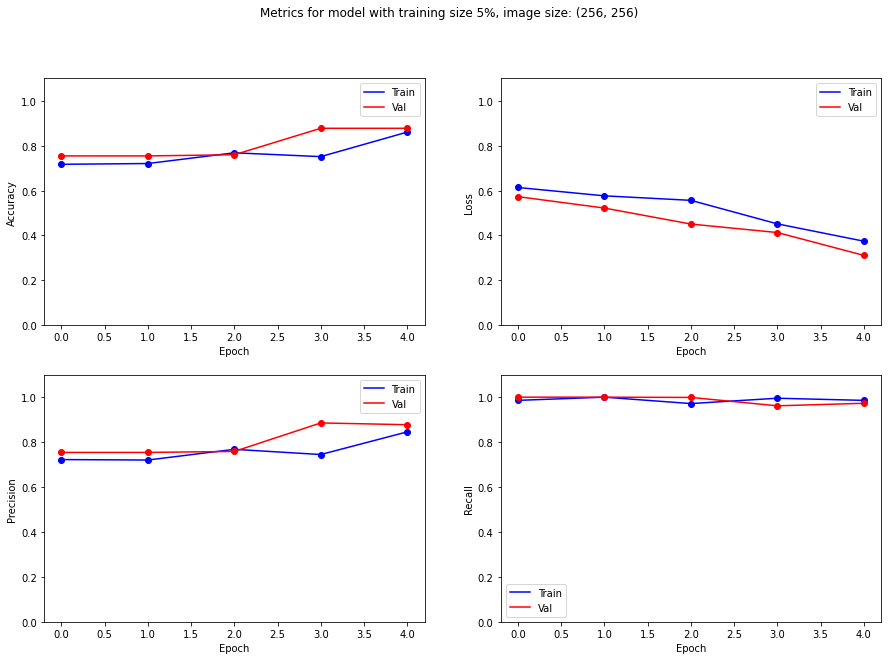

1/1 [==============================] - 0s 89ms/step
web_pneumonia1.jpg is predicted to show pneumonia. (Prediction value =0.8869969).
1/1 [==============================] - 0s 31ms/step
web_pneumonia2.jpg is predicted to show pneumonia. (Prediction value =0.7329963).
1/1 [==============================] - 0s 30ms/step
web_healthy1.jpg is predicted to show pneumonia. (Prediction value =0.56838506).
1/1 [==============================] - 0s 41ms/step
healthy_with_gorilla.jpg is predicted to show pneumonia. (Prediction value =0.5506285).


In [ ]:
TRAIN_SIZE = 5
IMAGE_SIZE = (256, 256)
run_model(TRAIN_SIZE, IMAGE_SIZE)

Not shown: similar code as above for training set sizes of 7%, 10%, 12%, 15%, 20%, 40%, ^0%, 80%, 90%

##CODE TO VISUALIZE THE EFFECT OF TRAINING SET SIZE ON METRICS: TBD
Once we have accuracy data of multiple training set sizes, we need to visualize the effect of set size on accuracy using some form of regression.

##CODE TO USE SMALLER/LARGER IMAGE SIZE WHEN PRE-PROCESSING DATA: TBD
Model_2 used an 80/20 test/train set and the images were pre-processed to an image size of 256x256 pixels, but what happens to accuracy (and speed of running the epochs) when we use the same model and same 80/20 division, but use an image size of e.g. 100x100 or 500x500 pixels instead?

Found 5856 files belonging to 2 classes.
Using 4685 files for training.
Found 5856 files belonging to 2 classes.
Using 1171 files for validation.
Images have been processed to shape: 
(32, 25, 25, 1)
Some images with resolution of (25, 25)


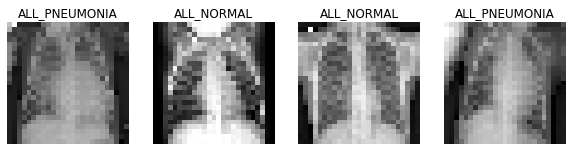

Epoch 1/5
147/147 [==============================] - 42s 267ms/step - loss: 0.5976 - accuracy: 0.7148 - precision: 0.7236 - recall: 0.9802 - val_loss: 0.5626 - val_accuracy: 0.7541 - val_precision: 0.7541 - val_recall: 1.0000
Epoch 2/5
147/147 [==============================] - 41s 267ms/step - loss: 0.5567 - accuracy: 0.7240 - precision: 0.7239 - recall: 1.0000 - val_loss: 0.4963 - val_accuracy: 0.7541 - val_precision: 0.7541 - val_recall: 1.0000
Epoch 3/5
147/147 [==============================] - 39s 257ms/step - loss: 0.4793 - accuracy: 0.7580 - precision: 0.7525 - recall: 0.9917 - val_loss: 0.4001 - val_accuracy: 0.8343 - val_precision: 0.8354 - val_recall: 0.9717
Epoch 4/5
147/147 [==============================] - 39s 256ms/step - loss: 0.3871 - accuracy: 0.8284 - precision: 0.8317 - recall: 0.9563 - val_loss: 0.3613 - val_accuracy: 0.8599 - val_precision: 0.9358 - val_recall: 0.8743
Epoch 5/5
147/147 [==============================] - 39s 255ms/step - loss: 0.3327 - accuracy: 0

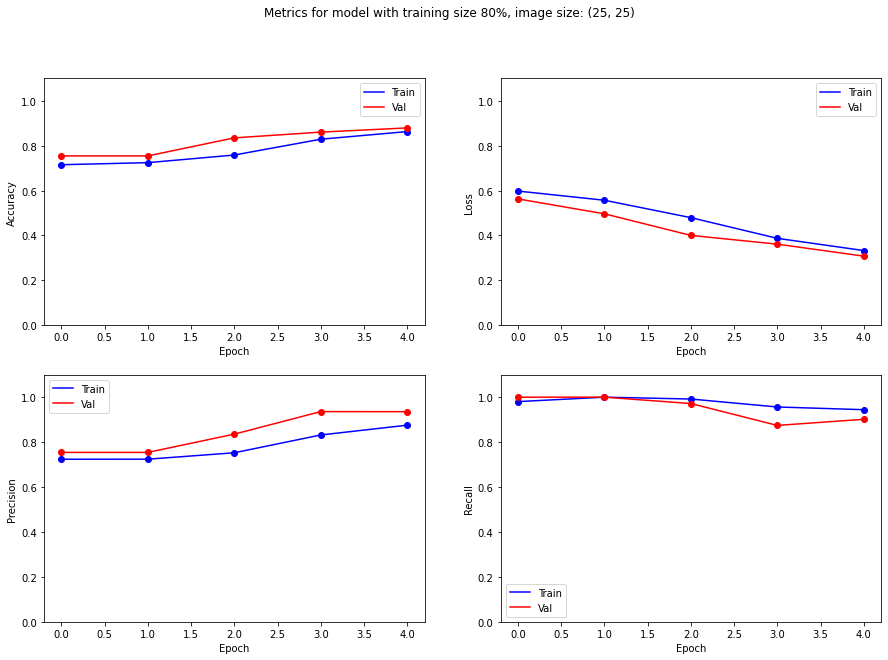

1/1 [==============================] - 0s 72ms/step
web_pneumonia1.jpg is predicted to show pneumonia. (Prediction value =0.7839558).
1/1 [==============================] - 0s 18ms/step
web_pneumonia2.jpg is predicted to show pneumonia. (Prediction value =0.8074275).
1/1 [==============================] - 0s 18ms/step
web_healthy1.jpg is predicted to show pneumonia. (Prediction value =0.27297843).
1/1 [==============================] - 0s 18ms/step
healthy_with_gorilla.jpg is predicted to show a normal lung. (Prediction value =0.2620539).


In [ ]:
TRAIN_SIZE = 80
IMAGE_SIZE = (25, 25)
run_model(TRAIN_SIZE, IMAGE_SIZE)

Not shown: code similar to block above for image sizes of 35x35; 50x50; 75x75; 100x100; 175x175; 500x500; 750x750

##CODE TO VISUALIZE THE EFFECT OF IMAGE SIZE ON METRICS:TBD


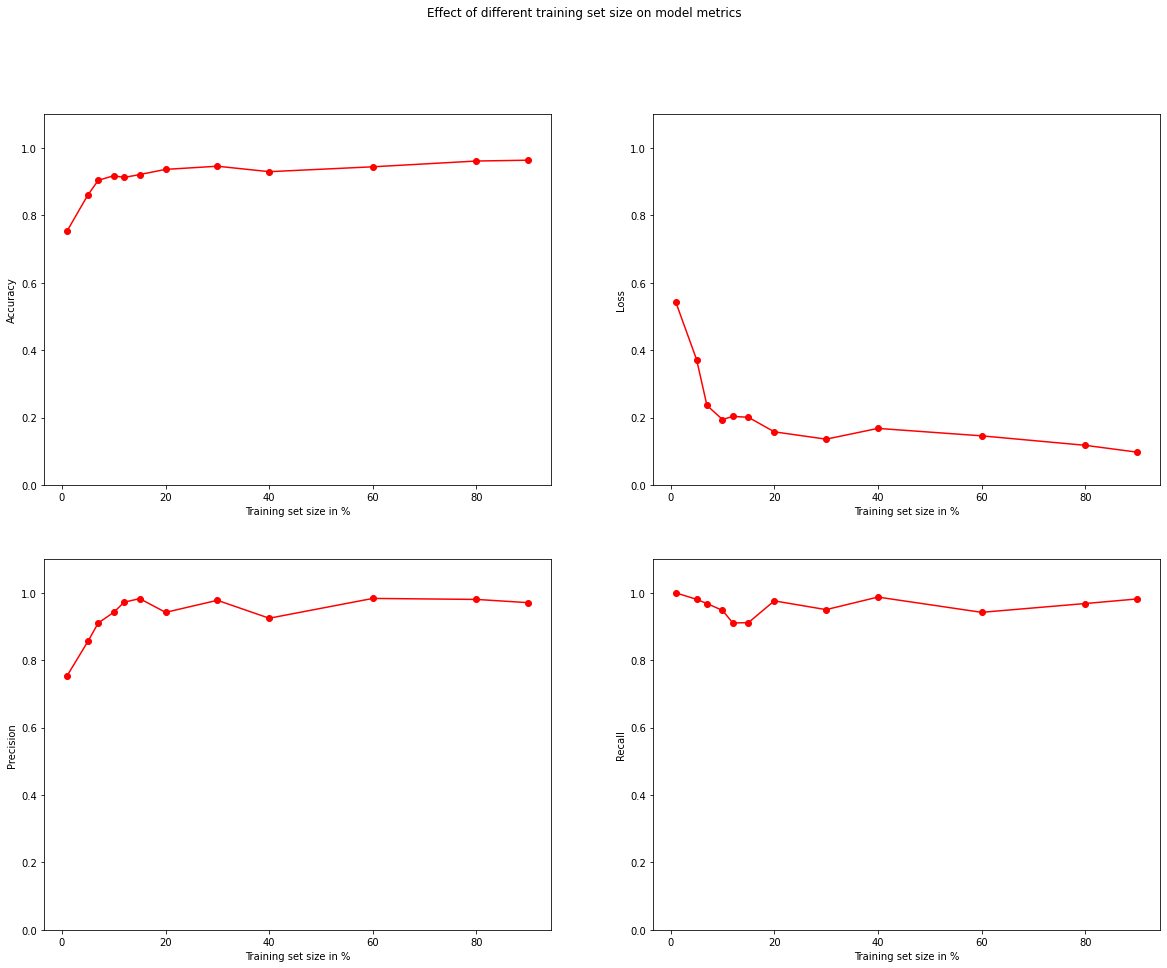

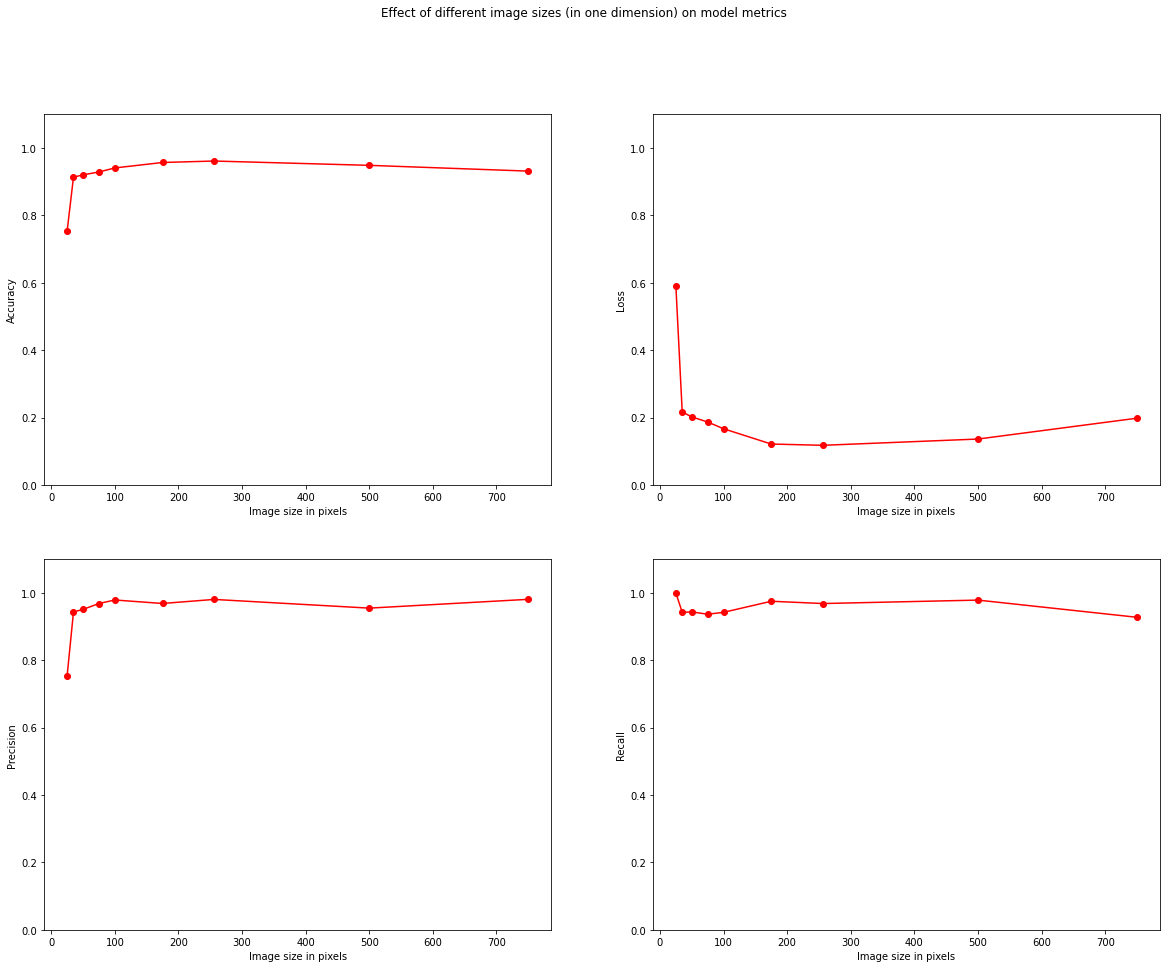

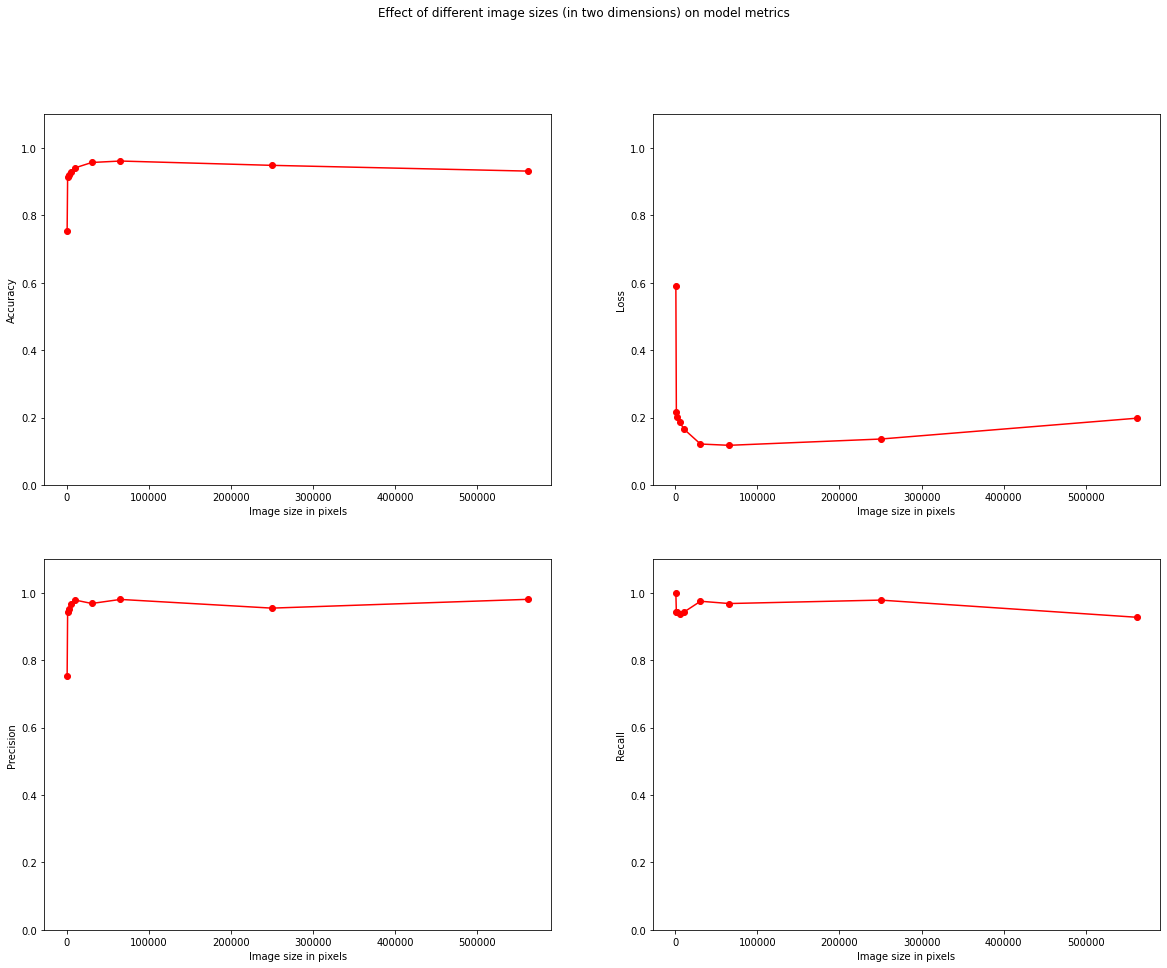

In [ ]:
from numpy.ma.core import size
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Defining the datasets

#metrics from experiment with varying training set size
x_train_size = [1, 5 ,7 ,10, 12, 15, 20, 30, 40, 60, 80, 90] # different training set sizes used in %
y_train_acc = [0.7541 , 0.8608 , 0.9044 , 0.9180 , 0.9129 , 0.9214 , 0.9368 , 0.9462 , 0.9300 , 0.9445 , 0.9616 , 0.9641] 
y_train_loss = [0.5423 , 0.3724 , 0.2363 , 0.1944 , 0.2038 , 0.2010 , 0.1579 , 0.1361 , 0.1681 , 0.1460 , 0.1179 , 0.0976 ]
y_train_prec = [0.7541 , 0.8557 , 0.9105 , 0.9423 , 0.9722 , 0.9829 , 0.9421 , 0.9779 , 0.9247 , 0.9835 , 0.9805 , 0.9709 ]
y_train_recall = [ 1.000 , 0.9807 , 0.9683 , 0.9479 , 0.9105 , 0.9117 , 0.9762 , 0.9502 , 0.9875 , 0.9422 , 0.9683 , 0.9819 ]

#metrics from experiment with varying image size
x_image_1d = [25, 35, 50, 75, 100, 175, 256, 500, 750]
x_image_2d = []
for i in x_image_1d:
  x_image_2d.append(i*i)
y_image_acc = [0.7541 , 0.9137 , 0.9206 , 0.9291 , 0.9411 , 0.9573 , 0.9616 , 0.9488 , 0.9317 ]
y_image_loss = [0.5918 , 0.2170 , 0.2022 , 0.1871 , 0.1670 , 0.1217 , 0.1179 , 0.1365 , 0.1984 ]
y_image_prec = [0.7541 , 0.9433 , 0.9509 , 0.9684 , 0.9788 , 0.9685 , 0.9805 , 0.9547 , 0.9808 ]
y_image_recall = [1.000 , 0.9422 , 0.9434 , 0.9366 , 0.9422 , 0.9751 , 0.9683 , 0.9785 , 0.9275 ]

#Plot effect of training set size
labels = ['Accuracy', 'Loss', 'Precision', 'Recall']
metrics = [y_train_acc, y_train_loss, y_train_prec, y_train_recall]

plt.figure(figsize=(20, 15))
plt.suptitle('Effect of different training set size on model metrics')
plt.tight_layout
for n, metric in enumerate(metrics):
    plt.subplot(2,2,n+1)
    plt.plot(x_train_size, metric, color='red')
    plt.plot(x_train_size, metric, 'ro')
    plt.xlabel('Training set size in %')
    plt.ylabel(labels[n])
    plt.ylim([0,1.1])    
plt.show()

print()

#Plot effect of image size (1D)
metrics = [y_image_acc, y_image_loss, y_image_prec, y_image_recall]

plt.figure(figsize=(20, 15))
plt.suptitle('Effect of different image sizes (in one dimension) on model metrics')
plt.tight_layout
for n, metric in enumerate(metrics):
    plt.subplot(2,2,n+1)
    plt.plot(x_image_1d, metric, color='red')
    plt.plot(x_image_1d, metric, 'ro')
    #plt.plot(history.epoch, history.history[metric], 'bo')
    plt.xlabel('Image size in pixels')
    plt.ylabel(labels[n])
    plt.ylim([0,1.1])    
plt.show()

print()

#PLot effect of image size (2D)
plt.figure(figsize=(20, 15))
plt.suptitle('Effect of different image sizes (in two dimensions) on model metrics')
plt.tight_layout
for n, metric in enumerate(metrics):
    plt.subplot(2,2,n+1)
    plt.plot(x_image_2d, metric, color='red')
    plt.plot(x_image_2d, metric, 'ro')
    plt.xlabel('Image size in pixels')
    plt.ylabel(labels[n])
    plt.ylim([0,1.1])    
plt.show()

# New Section

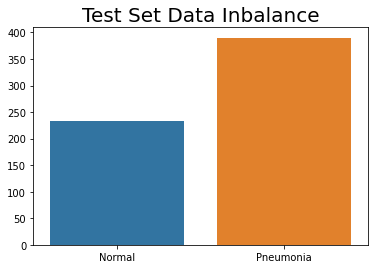

In [ ]:
test_samplesize = pd.DataFrame.from_dict(
    {'Normal': [len([os.path.join(path+'/test/NORMAL', filename) 
                     for filename in os.listdir(path+'/test/NORMAL')])], 
     'Pneumonia': [len([os.path.join(path+'/test/PNEUMONIA', filename) 
                        for filename in os.listdir(path+'/test/PNEUMONIA')])]})

sns.barplot(data=test_samplesize).set_title('Test Set Data Inbalance', fontsize=20)
plt.show()

In [ ]:
def validation_step(batch):
        images,labels = batch
        images,labels = images.to(device),labels.to(device)
        out = model(images)                                      
        loss = F.cross_entropy(out, labels)                    
        acc,preds = accuracy(out, labels)                       
        
        return {'val_loss': loss.detach(), 'val_acc':acc.detach(), 
                'preds':preds.detach(), 'labels':labels.detach()}

In [ ]:
 def test_prediction(outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()           
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()             
        # combine predictions
        batch_preds = [pred for x in outputs for pred in x['preds'].tolist()] 
        # combine labels
        batch_labels = [lab for x in outputs for lab in x['labels'].tolist()]  
        
        return {'test_loss': epoch_loss.item(), 'test_acc': epoch_acc.item(),
                'test_preds': batch_preds, 'test_labels': batch_labels}  

In [ ]:
#@torch.no_grad()
def test_predict(model, test_loader):
    model.eval()
    # perform testing for each batch
    outputs = [validation_step(batch) for batch in test_loader] 
    results = test_prediction(outputs)                          
    print('test_loss: {:.4f}, test_acc: {:.4f}'
          .format(results['test_loss'], results['test_acc']))
    
    return results['test_preds'], results['test_labels']

In [ ]:
# Get dataset from directory
import os 

# Mathematical operations
import numpy as np

# Theses libraries are used for read images
import cv2
from PIL import Image
from skimage import io

# Show images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# A Counter is a dict subclass for counting hashable objects
from collections import Counter

In [ ]:
DATA_DIR = "/content/gdrive/MyDrive/chest_xray/train"



In [ ]:
# Read from opencv
read_cv2_image = cv2.imread('../chest_xray/train/NORMAL/IM-0135-0001.jpeg', 1)

# Read from matplotlib
read_plt_image = mpimg.imread('../chest_xray/train/NORMAL/IM-0135-0001.jpeg')

# Read from skimage
read_skimage_image = io.imread('../chest_xray/train/NORMAL/IM-0135-0001.jpeg')

NameError: ignored

In [ ]:
num_label = {'Normal': 0, 'Pneumonia' : 1}
Y_test = df_test['class'].copy().map(num_label).astype('int')

NameError: ignored

In [ ]:
print("Test Accuracy: ", accuracy_score(Y_test, pred_labels))

NameError: ignored

In [ ]:
ds_test.reset()
predictions = model_pretrained.predict(ds_test, steps=len(ds_test), verbose=0)
pred_labels= np.where(predictions>0.5, 1, 0)

NameError: ignored

In [ ]:
confusion_matrix = metrics.confusion_matrix(Y_test, pred_labels)
sns.heatmap(confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

NameError: ignored

In [ ]:
print(classification_report(Y_test, pred_labels, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

NameError: ignored

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#Import the Colab drive mapping library and (re)mount data, import libraries
from google.colab import drive
import tensorflow as tf
from keras.optimizers import Adam
from keras.layers import InputLayer, Dense, Flatten, Conv2D, MaxPool2D, Activation
from keras import Sequential
import os
from matplotlib import pyplot as plt
drive.mount('/content/gdrive/')

#variable definitions
path = "/content/gdrive/MyDrive/chest_xray/"
img_dir = path + "MERGED/"
dataset = pd.read(path)
dataset.head()

#Correlation Matrix Heatmap Plot:-
data.corr()
plt.figure(figsize=(13,13))
#seaborn.heatmap(data.corr(), annot = True)
sns.heatmap(data.corr(),annot=True);

Mounted at /content/gdrive/


AttributeError: ignored

In [ ]:
#Let's generate image data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

NameError: ignored

In [ ]:
#let's train!
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

NameError: ignored

In [ ]:
testset = ImageFolder(path+'/test',                  
    transform=transform.Compose([transform.Resize(255),
    transform.CenterCrop(224),                                                              
    transform.ToTensor(),
]))

NameError: ignored

In [ ]:
test_dl = DataLoader(testset, batch_size=256)
model.to(device)
preds,labels = test_predict(model, test_dl)

NameError: ignored

In [ ]:
# Plot confusion matrix
cm = confusion_matrix(labels, preds)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8),cmap=plt.cm.Blues)
plt.xticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.yticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.xlabel('Predicted Label',fontsize=18)
plt.ylabel('True Label',fontsize=18)
plt.show()

NameError: ignored

In [ ]:
#let's visualize
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

NameError: ignored

In [ ]:
# Compute Performance Metrics
tn, fp, fn, tp = cm.ravel()

accuracy = (np.array(preds) == np.array(labels)).sum() / len(preds)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1 = 2*((precision*recall)/(precision+recall))

print("Accuracy of the model is {:.2f}".format(accuracy))
print("Recall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))
print("F1 Score of the model is {:.2f}".format(f1))

NameError: ignored

In [ ]:
fig, ax = plt.subplots(figsize=(8,12), ncols=2, nrows=4)

for row in range(4):
    img,label = testset[row]
    pred = torch.exp(model(img.to(device).unsqueeze(0)))
    class_name = ['NORMAL', 'PNEUMONIA']
    classes = np.array(class_name)
    pred = pred.cpu().data.numpy().squeeze()
    ax[row][0].imshow(img.permute(1, 2, 0))
    ax[row][0].set_title('Real : {}'.format(class_name[label]))
    ax[row][0].axis('off')
    ax[row][1].barh(classes, pred)
    ax[row][1].set_aspect(0.1)
    ax[row][1].set_yticks(classes)
    ax[row][1].set_yticklabels(classes)
    ax[row][1].set_title('Predicted Class')
    ax[row][1].set_xlim(0, 1.)
    plt.tight_layout()

NameError: ignored